A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, **purchase amount**) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc

In [ ]:
#Import data
url = "https://raw.githubusercontent.com/michellel-debug/proyecto_final/main/black_friday.csv"
df = pd.read_csv(url)

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
#Check basic statistics of dataset

#Basic information

df.info()
#NOMRLAMENTE SI TENEMOS INFO DE TYPO INTEGER Y SABEMOS QUE ES CATEGÓRICA, LO MEJOR ES TRASNFORMARLA A STRING/OBJECT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
#Converting variables onto objects
df['Occupation']=df['Occupation'].astype('object')
df['User_ID']=df['User_ID'].astype('object')
df['Marital_Status']=df['Marital_Status'].astype('object')
df['Product_Category_1']=df['Product_Category_1'].astype('object')
df['Product_Category_2']=df['Product_Category_2'].astype('object')
df['Product_Category_3']=df['Product_Category_3'].astype('object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category_1          550068 non-null  object
 9   Product_Category_2          376430 non-null  object
 10  Product_Category_3          166821 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 50.4+ MB


In [ ]:
#Check for missing values in the data
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
#Obtaining missing values in percentages
100*df.isna().sum()/len(df) 

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
#check for unique values in data
len(df['User_ID'].unique())


5891

In [ ]:
len(df['Product_ID'].unique())


3631

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Occupation'].unique()

array([10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14,
       13, 6], dtype=object)

In [ ]:
df['Marital_Status'].unique()

array([0, 1], dtype=object)

In [ ]:
df['Product_Category_1'].unique()

array([3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20,
       19], dtype=object)

In [ ]:
df['Product_Category_2'].unique()

array([nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0, 12.0,
       9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

In [ ]:
df['Product_Category_3'].unique()

array([nan, 14.0, 17.0, 5.0, 4.0, 16.0, 15.0, 8.0, 9.0, 13.0, 6.0, 12.0,
       3.0, 18.0, 11.0, 10.0], dtype=object)

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

# Perform EDA (Explotary Data Analysis)

<Axes: >

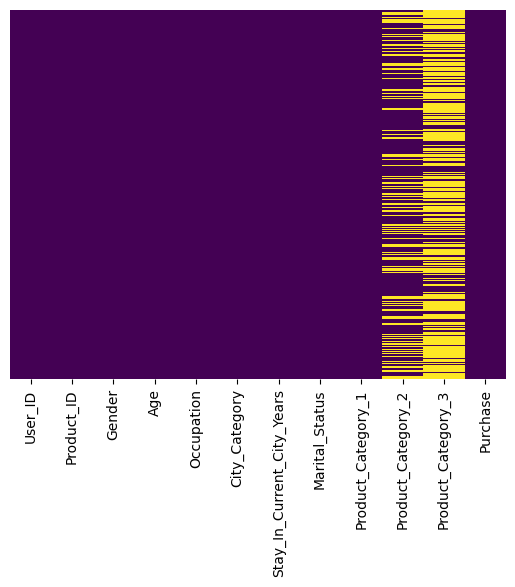

In [ ]:
#Missing Data
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="viridis")

Tenemos data nula en las columnas Product_Category_2 & Product_Category_3, siento Product_Category_3 la que tiene más incidencia.

<ipython-input-21-a30e5cf48b23>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"].dropna(), kde=False, color="darkred", bins=40)


<Axes: xlabel='Purchase'>

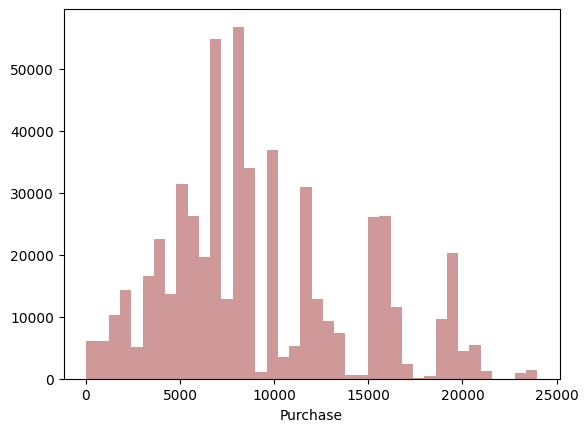

In [ ]:
sns.distplot(df["Purchase"].dropna(), kde=False, color="darkred", bins=40)

Gráfica donde se aprecia el monto de compra encontrados con más frecuencia, y los montos con menos frecuencia.

<Axes: xlabel='Gender', ylabel='count'>

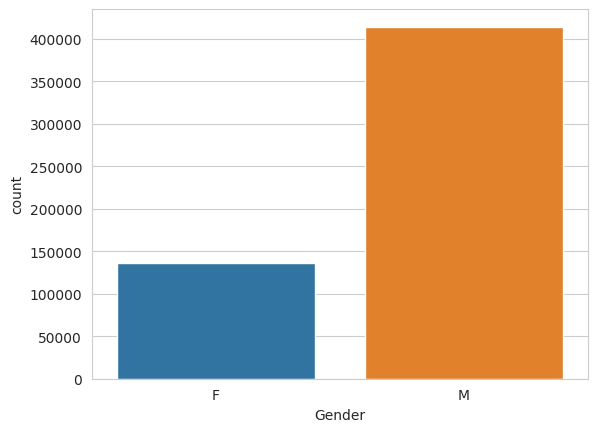

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Gender", data=df)

Los hombres compran significativamente más que las mujeres.

<Axes: xlabel='Age', ylabel='count'>

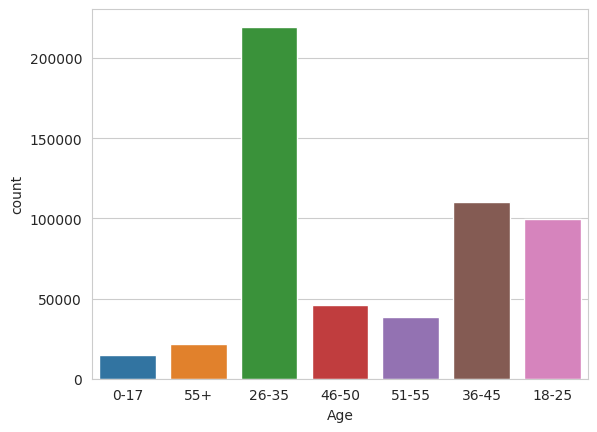

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Age", data=df)

El mayor número de compras lo hacen los clientes que se encuentran en un rango de 26 a 35 años 

<ipython-input-24-8419d9e91c75>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Occupation").mean()["Purchase"].plot(kind='bar')


<Axes: xlabel='Occupation'>

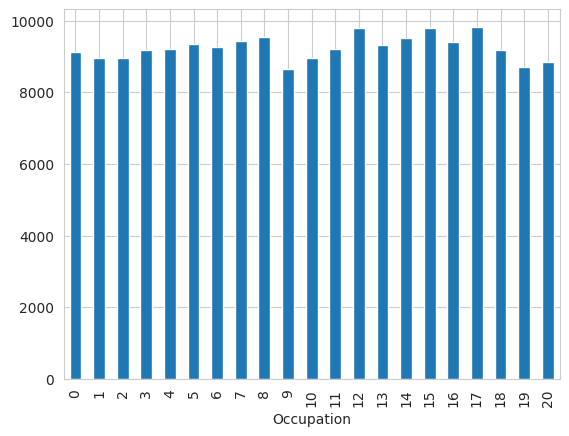

In [ ]:
df.groupby("Occupation").mean()["Purchase"].plot(kind='bar')

El promedio de compra es similar dentro de los distintos rangos de edad, sin embargo, el que más destaca es el grupo de 51-55.

<Axes: xlabel='Occupation', ylabel='count'>

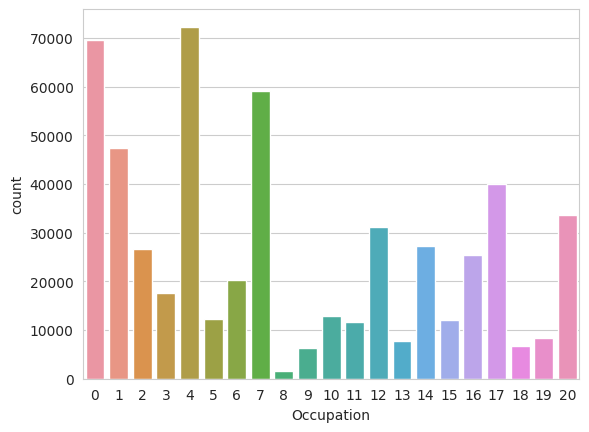

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Occupation", data=df)

El categoría de ocupación más común es la categoría 4. Por el contrario, la menos común es la categoría 8.

In [ ]:
prom_oc = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
prom_oc.sort_values(by="Purchase")

<ipython-input-26-6bfd060f078d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prom_oc = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])


,Purchase
Occupation,
9,8637.743761
19,8710.627231
20,8836.494905
2,8952.481683
1,8953.193270
10,8959.355375
0,9124.428588
18,9169.655844
3,9178.593088


Los clientes cuya compra promedio es mayor son pertenecientes a la categoría de trabajo 17. Los que compran menos, en promedio, son de la categoría de trabajo (ocupación) número 9.

<Axes: xlabel='Marital_Status', ylabel='count'>

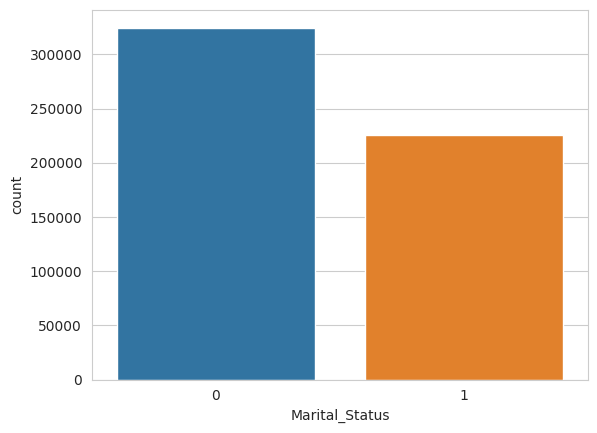

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Marital_Status", data=df)

Compran más las personas solteras que las casadas.

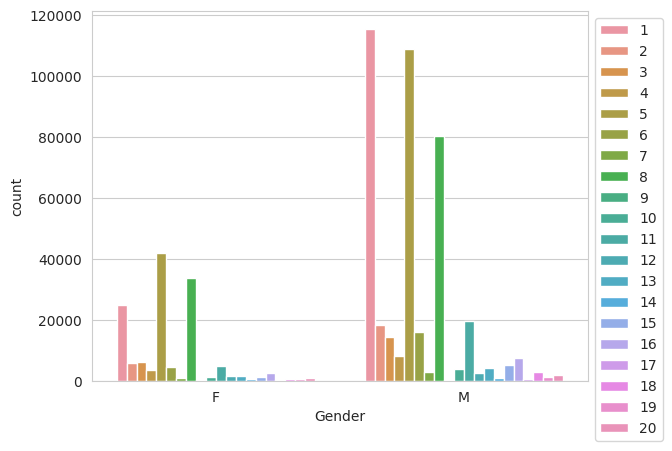

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Gender", hue="Product_Category_1", data=df)
plt.legend(bbox_to_anchor=(1, 1))

Dentro de la categoría número 1, las mujeres prefieren el producto número 5, mientras que los hombres prefieren el producto número 1.

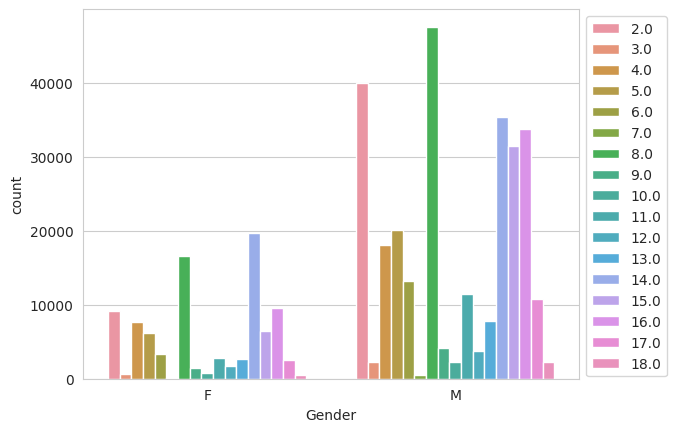

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Gender", hue="Product_Category_2", data=df)
plt.legend(bbox_to_anchor=(1, 1))


Dentro de la categoría número 2, las mujeres prefieren el producto número 14, mientras que los hombres prefieren el producto número 8.

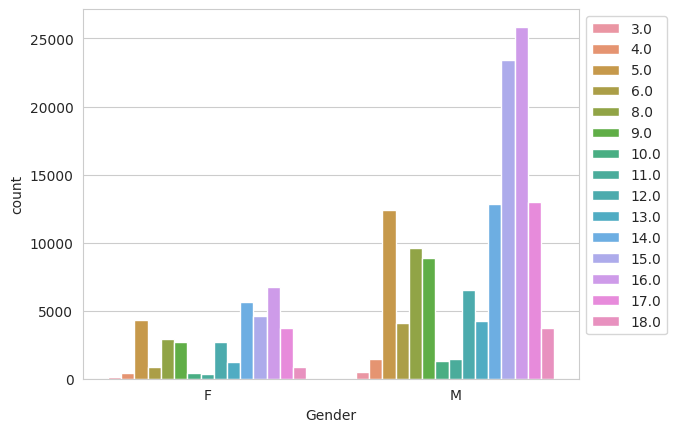

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Gender", hue="Product_Category_3", data=df)
plt.legend(bbox_to_anchor=(1, 1))

Dentro de la categoría número 3, tanto los hombres como las mujeres prefieren el producto número 16.

<Axes: xlabel='City_Category', ylabel='count'>

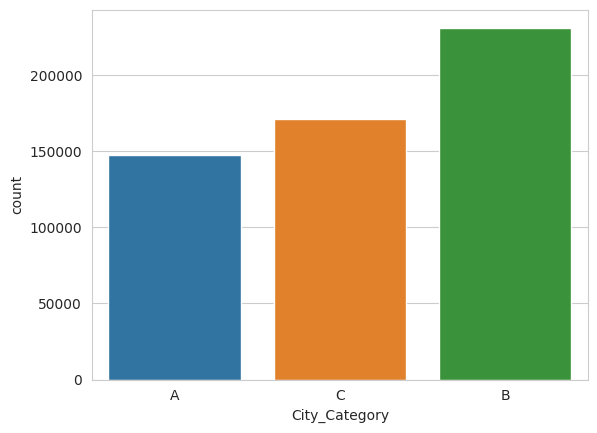

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="City_Category", data=df)

In [ ]:
prom_oc = pd.DataFrame(df.groupby("City_Category").mean()["Purchase"])
prom_oc.sort_values(by="Purchase")

<ipython-input-32-ed7cb2075d9c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prom_oc = pd.DataFrame(df.groupby("City_Category").mean()["Purchase"])


,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


Las personas que más compran, en promedio, son las que viven dentro de la categoría de ciudad C. Las que compran menos, en promedio, viven dentro de una ciudad que se encuentra en la categoría A.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

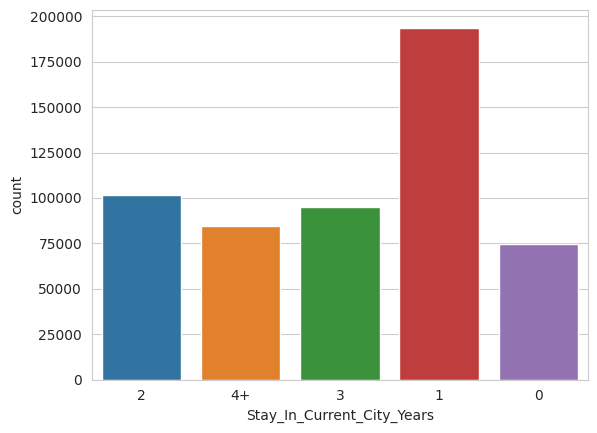

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Stay_In_Current_City_Years", data=df)

Las personas que tienen viviendo 1 año en la ciudad donde viven actualmente son las que realizan más compras.

<ipython-input-34-20031cab8eba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')


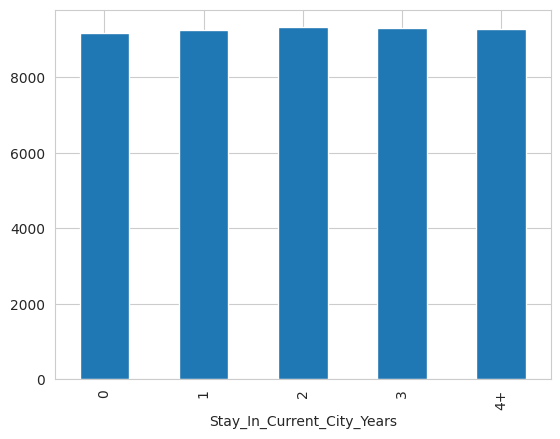

In [ ]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.show()

Las personas de los distintos rangos de estadía dentro de su ciudad suelen gastar de manera muy similar.

<Axes: ylabel='Density'>

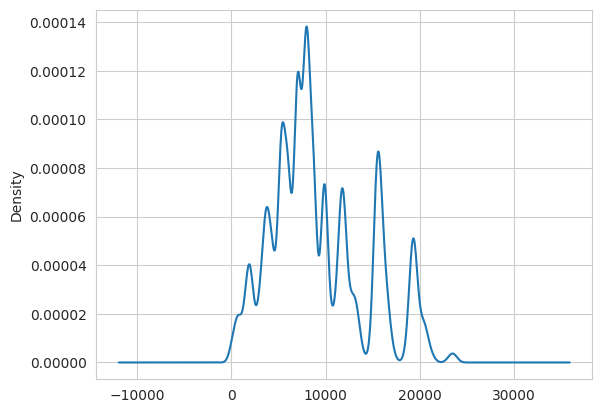

In [ ]:
#Purchase Distribution

df["Purchase"].plot(kind='kde')

<Axes: >

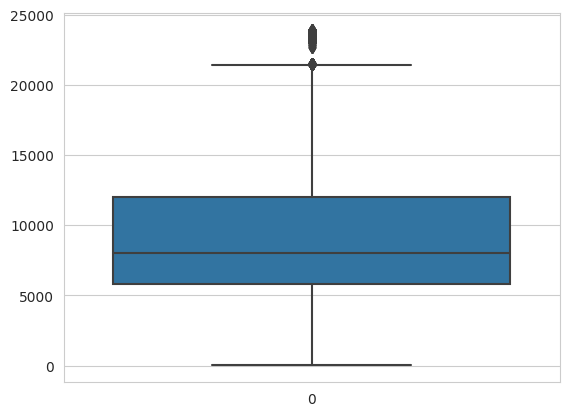

In [ ]:
#check for outliers
sns.boxplot(df['Purchase'])

In [ ]:
#Drop unnecessary fields
df = df.drop(["User_ID","Product_ID"],axis=1)


In [ ]:
#Convert categorical data into integer using map function (e.g 'Gender' column)
#Determino columnas a modificar
columnas = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years',]
j = len(columnas)
df1 = df
def convert_catToInt (columna):
    #obntengo valores categoricos y cantidad
    a = df1[columna].unique() 
    a.sort()
    n = len(df1[columna].unique())

    #creo un arreglo para asignarle valor entero del tamaño de n
    b = [0] * n  
    for i in range(n):
        b[i] = i

    #Creo un diccionario para    
    c = dict(zip(a, b))
    
    #Remplazo valores categoricos con los numericos
    df1[columna] = df1[columna].map(c)
    df1.loc[:10,columna]


#Mandamos convertir valores categoricos en enteros
for k in range(j):
    convert_catToInt(columnas[k])
    
df1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,NaN,NaN,368
550064,0,2,1,2,3,0,20,NaN,NaN,371
550065,0,2,15,1,4,1,20,NaN,NaN,137
550066,0,6,1,2,2,0,20,NaN,NaN,365


In [ ]:
#Rename column

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,2,4,0,8,NaN,NaN,7969


In [ ]:
#map range variables into integers (e.g 'Age' column)
print(df.dtypes)

Gender                         int64
Age                            int64
Occupation                    object
City_Category                  int64
Stay_In_Current_City_Years     int64
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object


In [ ]:
print(df.dtypes)

Gender                         int64
Age                            int64
Occupation                    object
City_Category                  int64
Stay_In_Current_City_Years     int64
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object


Data Visualisation


<Axes: >

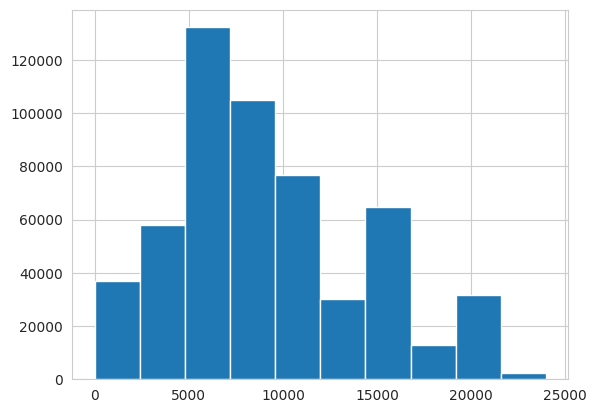

In [ ]:
#visualize individual column

df['Purchase'].hist()

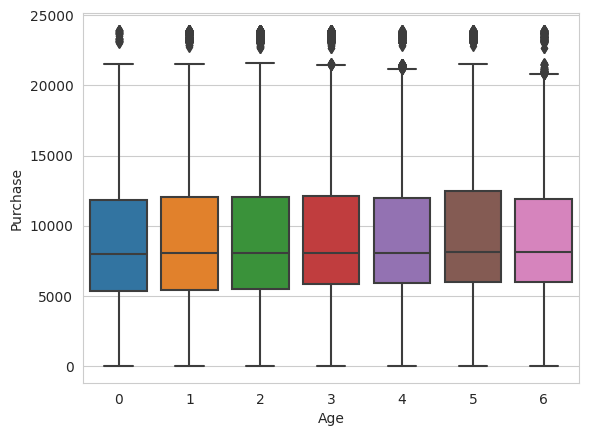

In [ ]:
#Age vs Purchased

sns.boxplot(x="Age", y="Purchase", data=df)
plt.show()

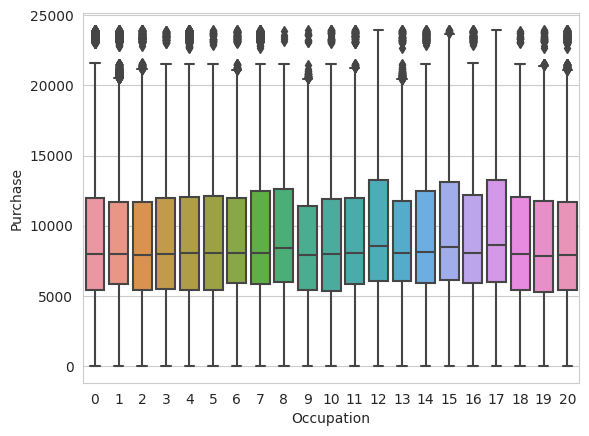

In [ ]:
#Occupation vs Purchased
sns.boxplot(x="Occupation", y="Purchase", data=df)
plt.show()

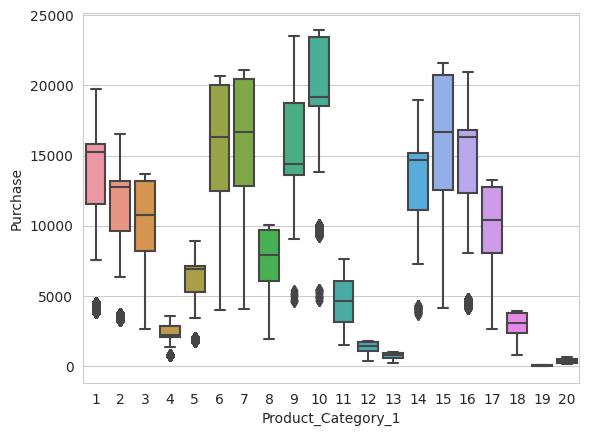

In [ ]:
#Productcategory1 vs Purchased
sns.boxplot(x="Product_Category_1", y="Purchase", data=df)
plt.show()

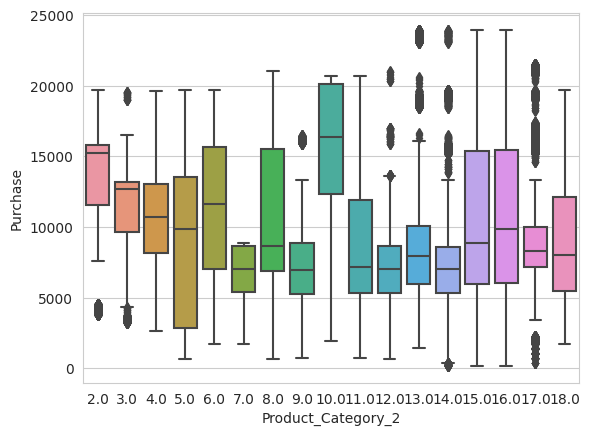

In [ ]:
#Productcategory2 vs Purchased
sns.boxplot(x="Product_Category_2", y="Purchase", data=df)
plt.show()

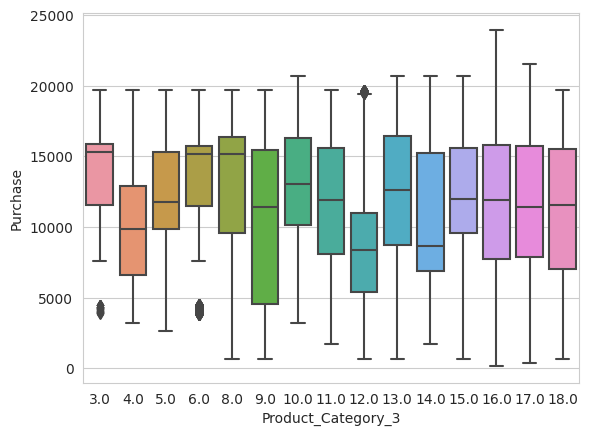

In [ ]:
#Productcategory3 vs Purchased

sns.boxplot(x="Product_Category_3", y="Purchase", data=df)
plt.show()

In [ ]:
#City category pie chart
df_for_pie = df.groupby('City_Category').size()
df_for_pie

City_Category
0    147720
1    231173
2    171175
dtype: int64

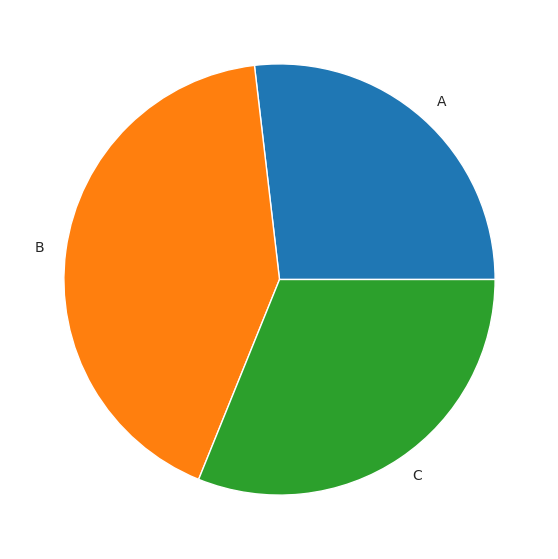

In [ ]:
labels=["A", "B", "C"]
df_for_pie = df.groupby('City_Category').size()
plt.figure(figsize=(7,7))
plt.pie(df_for_pie, labels=labels);

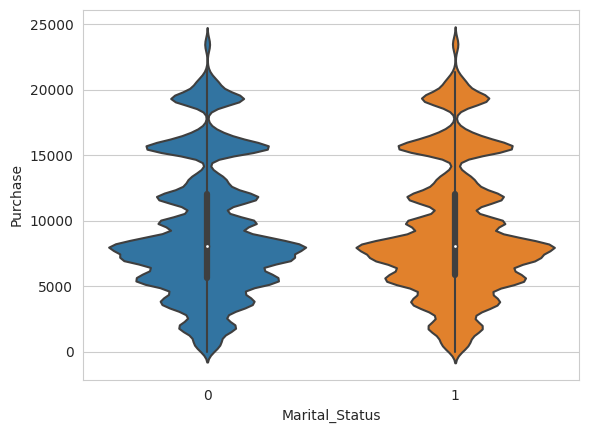

In [ ]:
#check for more possible plots

sns.violinplot(x="Marital_Status", y="Purchase", data=df, size=8)
plt.show()

## regresión lineal

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/michellel-debug/proyecto_final/main/black_friday.csv"
df = pd.read_csv(url)



In [ ]:
#Funcion para convertir valores categoricos en enteros
def convert_catToInt (columna):
    #obntengo valores categoricos y cantidad
    a = df[columna].unique() 
    a.sort()
    n = len(df[columna].unique())

    #creo un arreglo para asignarle valor entero del tamaño de n
    b = [0] * n  
    for i in range(n):
        b[i] = i

    #Creo un diccionario para    
    c = dict(zip(a, b))
    
    #Remplazo valores categoricos con los numericos
    df[columna] = df[columna].map(c)

In [ ]:
#Convertimos valores categoricos
columnas = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years',]
j = len(columnas)
for k in range(j):
    convert_catToInt(columnas[k])

In [ ]:
#Eliminamos columnas irrelevantes
df=df.drop(['User_ID', "Product_ID"],axis=1)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
df['Product_Category_2'].replace(np.nan,0,inplace = True)
df['Product_Category_3'].replace(np.nan,0,inplace = True)
df['Product_Category_2'] =df['Product_Category_2'].astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].astype('int64')

#df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years']).astype('int64')
df = pd.get_dummies(df, columns=['Product_Category_1']).astype('int64')
df = pd.get_dummies(df, columns=['Product_Category_2']).astype('int64')
df = pd.get_dummies(df, columns=['Product_Category_3']).astype('int64')
#df.info()

In [ ]:
X = df.drop("Purchase",axis=1)
y = df['Purchase']



In [ ]:
#construir el modelo de regresion multiple
from sklearn.linear_model import LinearRegression
modelo_mult = LinearRegression()
modelo_mult.fit(X, y)
y_pred = modelo_mult.predict(X)

from sklearn.metrics import r2_score
print(f'r2_score: {r2_score(y,y_pred)}')

r2_score: 0.6470863299867514


## Conclusión

El modelo de predicción es factible.
Realizando la división de variables dependientes (X) e independientes (y), obtuvimos de manera sencilla el resultado de la regresión lineal, lo cual permitió realizar dicha predicción. 

